In [28]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. Data Loading and Exploration


In [29]:
# Load all three datasets
features = pd.read_csv('dataset/Features data set.csv')
sales = pd.read_csv('dataset/sales data-set.csv')
stores = pd.read_csv('dataset/stores data-set.csv')

# Display basic information about each dataset
print("Features Dataset Info:")
print(f"Shape: {features.shape}")
print(f"Columns: {features.columns.tolist()}")
print("\nSales Dataset Info:")
print(f"Shape: {sales.shape}")
print(f"Columns: {sales.columns.tolist()}")
print("\nStores Dataset Info:")
print(f"Shape: {stores.shape}")
print(f"Columns: {stores.columns.tolist()}")

# Check for missing values
print("\nMissing Values:")
print("Features:", features.isnull().sum().sum())
print("Sales:", sales.isnull().sum().sum())
print("Stores:", stores.isnull().sum().sum())

# Display first few rows of each dataset
print("\nFeatures Data Sample:")
display(features.head())
print("\nSales Data Sample:")
display(sales.head())
print("\nStores Data Sample:")
display(stores.head())

Features Dataset Info:
Shape: (8190, 12)
Columns: ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']

Sales Dataset Info:
Shape: (421570, 5)
Columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']

Stores Dataset Info:
Shape: (45, 3)
Columns: ['Store', 'Type', 'Size']

Missing Values:
Features: 24040
Sales: 0
Stores: 0

Features Data Sample:


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False



Sales Data Sample:


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False



Stores Data Sample:


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [30]:
# Merge datasets for comprehensive analysis
# First merge sales with stores
sales_stores = pd.merge(sales, stores, on='Store', how='left')

# Then merge with features
full_data = pd.merge(sales_stores, features, on=['Store', 'Date', 'IsHoliday'], how='left')

print("Merged Dataset Shape:", full_data.shape)
print("Merged Dataset Columns:", full_data.columns.tolist())

Merged Dataset Shape: (421570, 16)
Merged Dataset Columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']


# 2. Basic Statistical Analysis

2.1 Compute mean and standard deviation of sales

In [31]:
# Basic statistics for sales
sales_stats = full_data['Weekly_Sales'].describe()
mean_sales = sales_stats['mean']
std_sales = sales_stats['std']

print("SALES STATISTICS:")
print(f"Mean Weekly Sales: {mean_sales:.2f}")
print(f"Standard Deviation of Weekly Sales: {std_sales:.2f}")
print(f"Coefficient of Variation: {(std_sales/mean_sales)*100:.2f}%")

# Additional statistics
median_sales = full_data['Weekly_Sales'].median()
mode_sales = full_data['Weekly_Sales'].mode()[0]

print(f"Median Weekly Sales: {median_sales:.2f}")
print(f"Mode Weekly Sales: {mode_sales:.2f}")

SALES STATISTICS:
Mean Weekly Sales: 15981.26
Standard Deviation of Weekly Sales: 22711.18
Coefficient of Variation: 142.11%
Median Weekly Sales: 7612.03
Mode Weekly Sales: 10.00


2.2 Interpret the range and interquartile range of sales

In [32]:
# Calculate range and IQR
sales_range = full_data['Weekly_Sales'].max() - full_data['Weekly_Sales'].min()
Q1 = full_data['Weekly_Sales'].quantile(0.25)
Q3 = full_data['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

print("\nRANGE AND INTERQUARTILE RANGE ANALYSIS:")
print(f"Range of Weekly Sales: {sales_range:.2f}")
print(f"Interquartile Range (IQR): {IQR:.2f}")
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")

# Identify outliers using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = full_data[(full_data['Weekly_Sales'] < lower_bound) | (full_data['Weekly_Sales'] > upper_bound)]

print(f"Lower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")
print(f"Number of outlier observations: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers)/len(full_data))*100:.2f}%")


RANGE AND INTERQUARTILE RANGE ANALYSIS:
Range of Weekly Sales: 698088.30
Interquartile Range (IQR): 18126.20
Q1 (25th percentile): 2079.65
Q3 (75th percentile): 20205.85
Lower bound for outliers: -25109.65
Upper bound for outliers: 47395.16
Number of outlier observations: 35521
Percentage of outliers: 8.43%


2.3 Visualize sales distribution

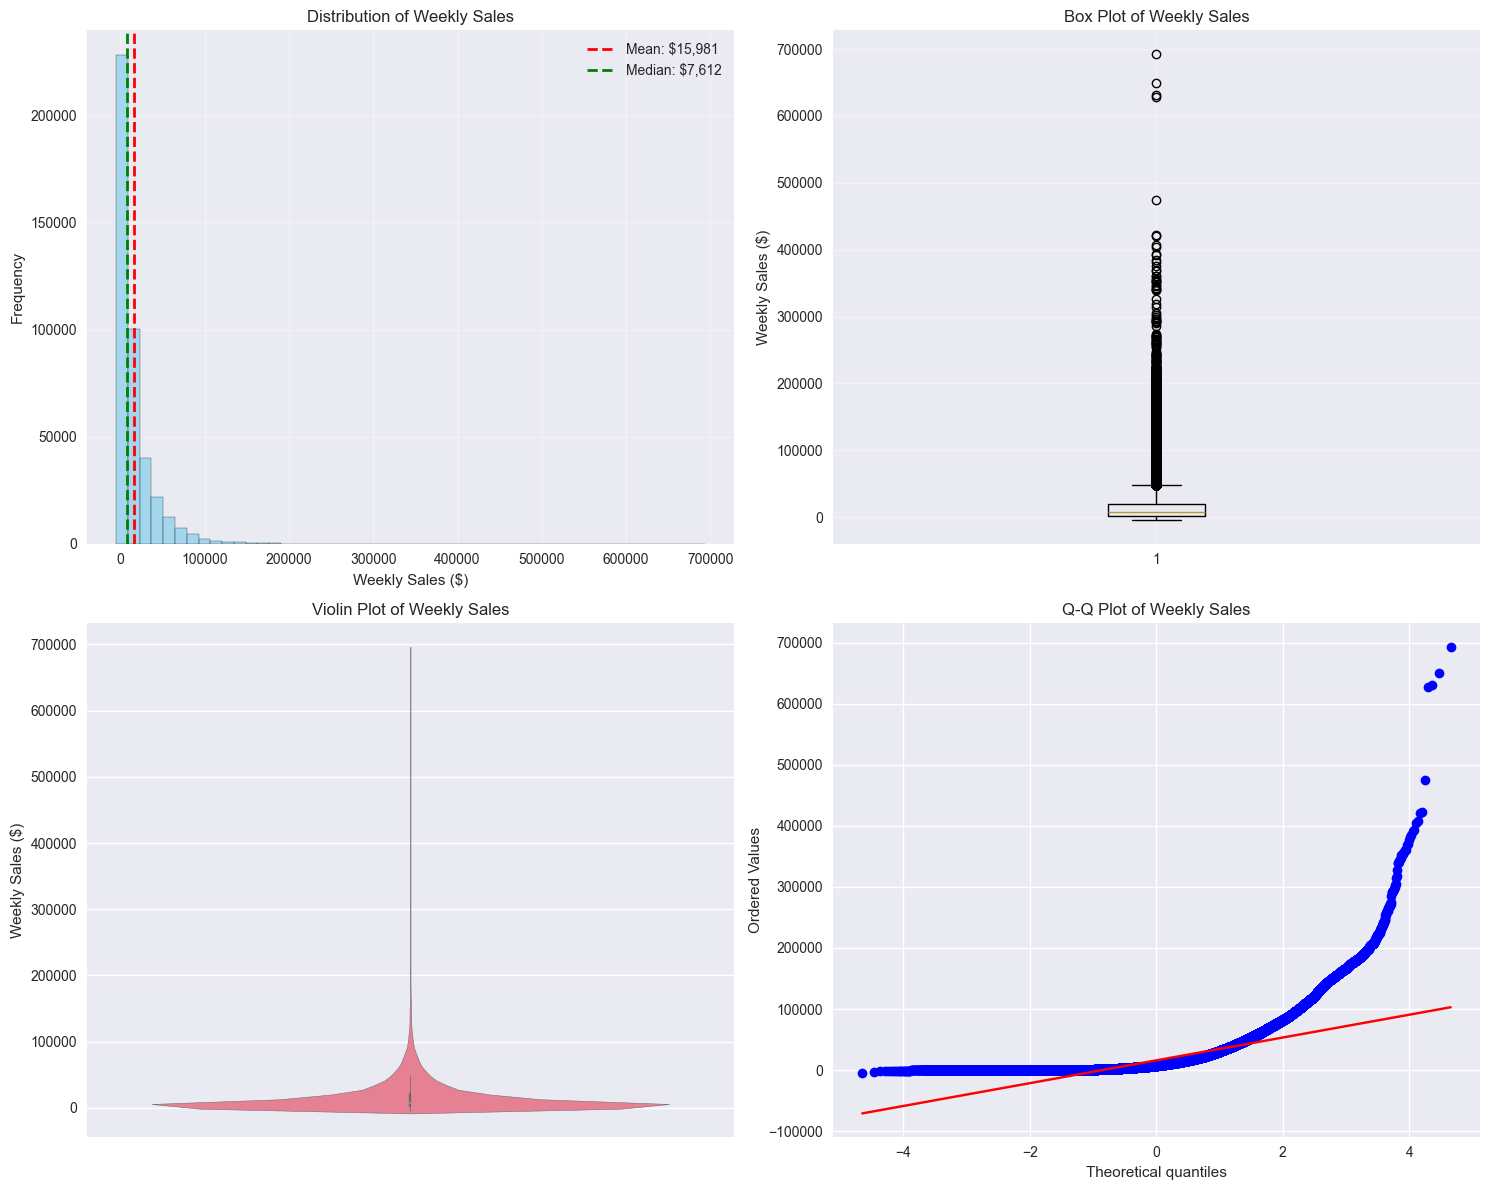

In [33]:
# Create subplots for sales distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram with KDE
axes[0,0].hist(full_data['Weekly_Sales'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(mean_sales, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_sales:,.0f}')
axes[0,0].axvline(median_sales, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_sales:,.0f}')
axes[0,0].set_xlabel('Weekly Sales ($)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Distribution of Weekly Sales')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Box plot
axes[0,1].boxplot(full_data['Weekly_Sales'])
axes[0,1].set_ylabel('Weekly Sales ($)')
axes[0,1].set_title('Box Plot of Weekly Sales')
axes[0,1].grid(True, alpha=0.3)

# Violin plot
sns.violinplot(y=full_data['Weekly_Sales'], ax=axes[1,0])
axes[1,0].set_ylabel('Weekly Sales ($)')
axes[1,0].set_title('Violin Plot of Weekly Sales')

# Q-Q plot
stats.probplot(full_data['Weekly_Sales'], dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot of Weekly Sales')

plt.tight_layout()
plt.show()

# 3. Analyze skewness of profit values


In [34]:
# Since there's no direct profit column, let's calculate it or use available financial metrics
# For this analysis, we'll use MarkDown columns as proxies for profit-related metrics

# Check which columns might represent profit/cost metrics
numeric_columns = full_data.select_dtypes(include=[np.number]).columns
print("Available numeric columns for profit analysis:")
print(numeric_columns.tolist())

# Let's use MarkDown columns as they might represent promotional costs affecting profit
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Calculate skewness for each MarkDown column
print("\nSKEWNESS ANALYSIS OF MARKDOWN/PROFIT-RELATED METRICS:")
for col in markdown_cols:
    if col in full_data.columns:
        skewness = full_data[col].skew()
        print(f"{col}: Skewness = {skewness:.4f}")

# Let's also analyze CPI (Consumer Price Index) as it affects profitability
if 'CPI' in full_data.columns:
    cpi_skewness = full_data['CPI'].skew()
    print(f"CPI: Skewness = {cpi_skewness:.4f}")

# Analyze unemployment as it affects consumer spending and profitability
if 'Unemployment' in full_data.columns:
    unemployment_skewness = full_data['Unemployment'].skew()
    print(f"Unemployment: Skewness = {unemployment_skewness:.4f}")

Available numeric columns for profit analysis:
['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']

SKEWNESS ANALYSIS OF MARKDOWN/PROFIT-RELATED METRICS:
MarkDown1: Skewness = 3.3418
MarkDown2: Skewness = 5.4413
MarkDown3: Skewness = 8.3995
MarkDown4: Skewness = 4.8475
MarkDown5: Skewness = 8.1699
CPI: Skewness = 0.0852
Unemployment: Skewness = 1.1837
